# Regresion Lineal: Costo de un incidente de seguridad

En este caso se explican los fundamentos básicos de la regresión lineal aplicada a un caso sencillo relacionado con la ciberseguridad

### Enunciado del ejercicio 

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se ven afectados. El DataSet 
es generado de manera aleatoria

## 1.-Generación del DataSet

In [1]:
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(x))

La longitud del DataSet es:  100


## 2.-Visualización del DataSet 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

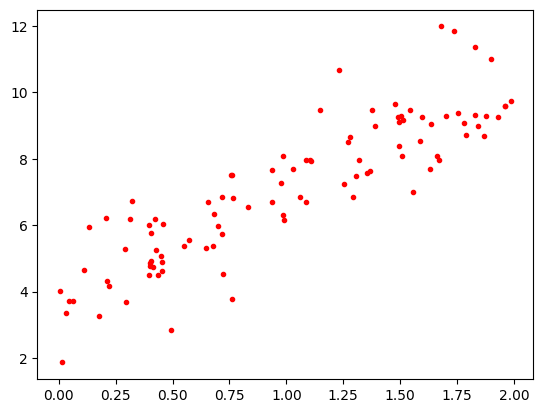

In [15]:
plt.plot(x, y, "r.")
plt.show()

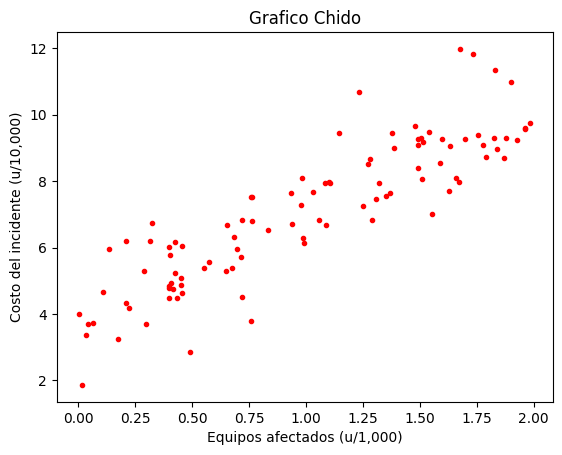

In [17]:
plt.plot(x, y, "r.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

## 3.- Modificacion del DataSet

In [18]:
import pandas as pd

In [20]:
data = {
    "No_Equipos_Afectados":x.flatten(), 
    "Costo": y.flatten(),
}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.716106,5.725931
1,1.319137,7.959618
2,0.434458,4.487606
3,0.289220,5.294603
4,0.451499,4.877096
5,1.084808,7.955544
6,0.313037,6.185098
7,1.927439,9.250378
8,1.985674,9.749381
9,0.043104,3.713366


In [23]:
# Escalado del número de equipos afectados 
df["No_Equipos_Afectados"] = df["No_Equipos_Afectados"] * 1000
df["No_Equipos_Afectados"] = df["No_Equipos_Afectados"].astype('int')
# Escalado del Costo
df["Costo"] = df["Costo"] * 10000
df["Costo"] = df["Costo"].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,716,57259
1,1319,79596
2,434,44876
3,289,52946
4,451,48770
5,1084,79555
6,313,61850
7,1927,92503
8,1985,97493
9,43,37133


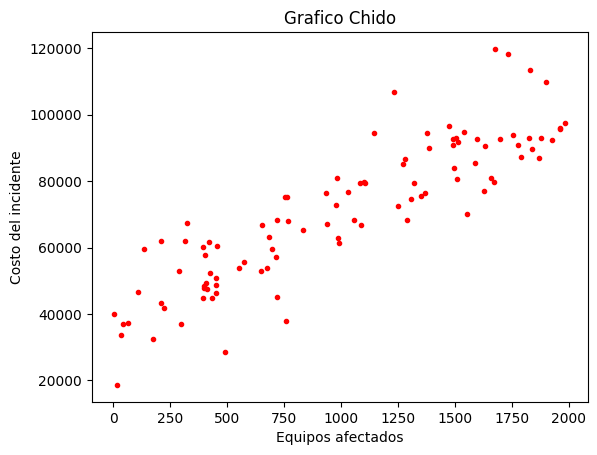

In [25]:
# Representación gráfica del DataSet
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "r.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construcción del modelo

In [28]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [29]:
#Construccion del modelo y ajuste de la hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df["No_Equipos_Afectados"].values.reshape(-1, 1), df["Costo"].values)

NameError: name 'LinearRegression' is not defined

In [30]:
# Parametro tetha 0
lin_reg.intercept_

NameError: name 'lin_reg' is not defined

In [31]:
# Parametro tetha 1
lin_reg.coef_

NameError: name 'lin_reg' is not defined

In [32]:
# Prediicción para el valor minimo y maximo del DataSet 
x_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max]])
y_train_pred = lin_reg.predict(x_min_max)

NameError: name 'lin_reg' is not defined

In [34]:
# Representacion grefica de la funcion de hipotesis generada
plt.plt(x_min_max, y_train_pred, "g-")
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "r.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

## 5.-Predicción de nuevos ejemplos

In [35]:
x_new = np.array([[1255]]) #No. de  equipos afectados

# Predicción del costo que tendría el incidente
costo = lin_reg.predict(x_new)

print("El costo del incidente sería: $", int(costo[0]))

NameError: name 'lin_reg' is not defined

NameError: name 'y_train_pred' is not defined

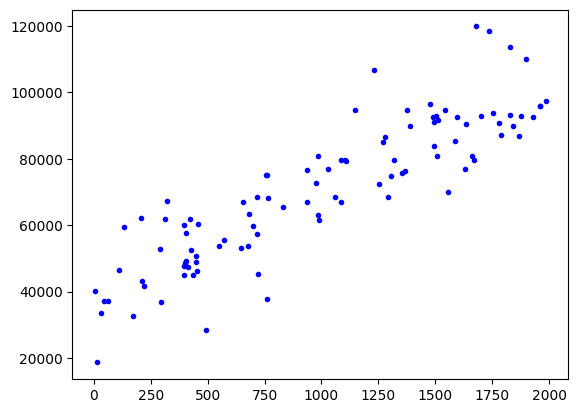

In [36]:
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, costo, "rX")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
ply.show()